In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Import libraries

from sqlalchemy import create_engine
import pyodbc
server = 'DESKTOP-DBOU3LA'         
database = 'BIKESTOREDB'

In [2]:
connection_string = (
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"Trusted_Connection=yes;"
)
print(connection_string)
engine = create_engine(f"mssql+pyodbc:///?odbc_connect={connection_string}")

print("Connection ready!")

DRIVER={ODBC Driver 17 for SQL Server};SERVER=DESKTOP-DBOU3LA;DATABASE=BIKESTOREDB;Trusted_Connection=yes;
Connection ready!


In [3]:
#Year-wise Revenue Breakdown (Bar Plot)
query= """ select year(o.order_date) as sales_year,count(distinct o.order_id) as order_count,count(distinct o.customer_id) as unique_customers,round(sum(oi.quantity * oi.list_price * (1- oi.discount)),2) as revenue
from orders o
join order_items oi on o.order_id = oi.order_id
group by year(o.order_date)
order by sales_year;""" 
df_year_revenue=pd.read_sql(query,engine)
df_year_revenue

,sales_year,order_count,unique_customers,revenue
0,2016,635,625,2427378.53
1,2017,688,684,3447208.24
2,2018,292,270,1814529.79


C:\Users\Hp\AppData\Local\Temp\ipykernel_10760\1816721922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sales_year', y="revenue", data=df_year_revenue, palette='Blues_d')


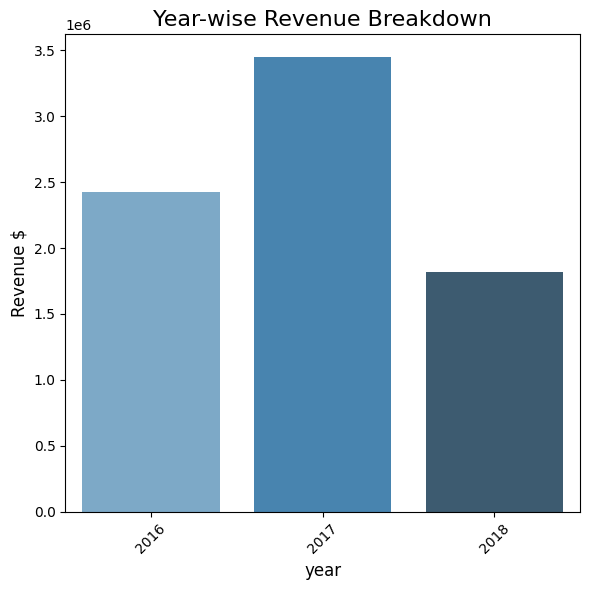

In [4]:
#bar plot for year-wise revenue
plt.figure(figsize=(6,6))
sns.barplot(x='sales_year', y="revenue", data=df_year_revenue, palette='Blues_d')
plt.title('Year-wise Revenue Breakdown', fontsize=16)
plt.xlabel('year',fontsize=12)
plt.ylabel('Revenue $',fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

          store_name        category_name     revenue
0      Rowlett Bikes       Mountain Bikes   316439.67
1      Baldwin Bikes       Mountain Bikes  1836392.23
2   Santa Cruz Bikes    Children Bicycles    61402.67
3      Rowlett Bikes           Road Bikes   217271.01
4      Baldwin Bikes     Comfort Bicycles   263829.84
5      Rowlett Bikes  Cyclocross Bicycles    60936.34
6   Santa Cruz Bikes    Cruisers Bicycles   207119.86
7   Santa Cruz Bikes           Road Bikes   307350.26
8      Rowlett Bikes       Electric Bikes    94844.51
9   Santa Cruz Bikes  Cyclocross Bicycles   162300.93
10  Santa Cruz Bikes       Electric Bikes   219010.49
11     Rowlett Bikes     Comfort Bicycles    43799.08
12  Santa Cruz Bikes       Mountain Bikes   562247.64
13     Baldwin Bikes    Children Bicycles   202651.88
14  Santa Cruz Bikes     Comfort Bicycles    86391.18
15     Rowlett Bikes    Children Bicycles    28134.65
16     Baldwin Bikes       Electric Bikes   602829.78
17     Baldwin Bikes        

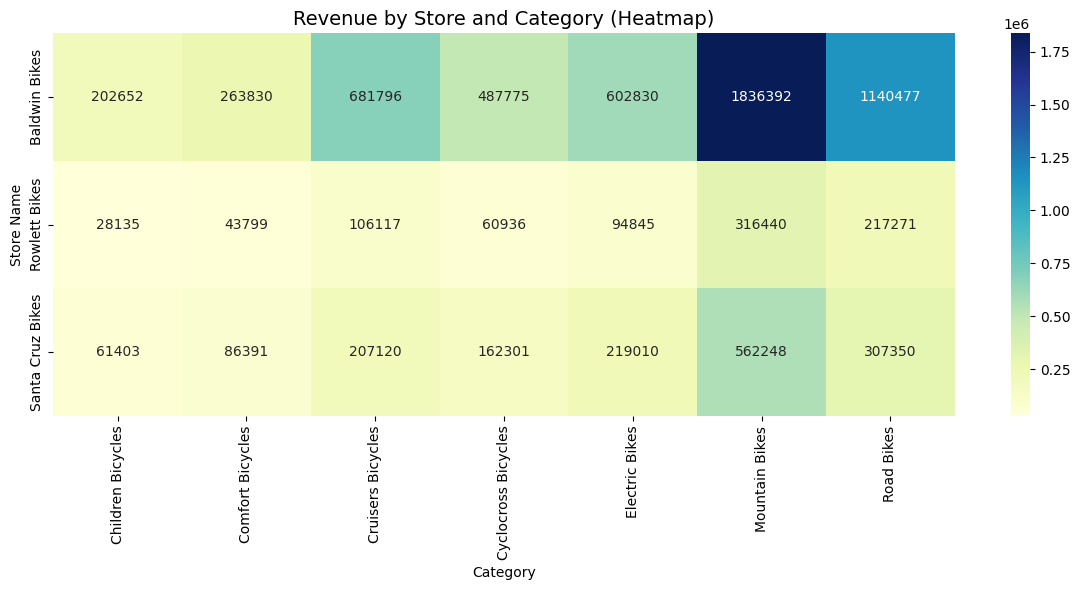

In [5]:
query_store_category = """
SELECT 
    s.store_name,
    c.category_name,
    ROUND(SUM(oi.quantity * oi.list_price * (1 - oi.discount)), 2) AS revenue
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN stores s ON o.store_id = s.store_id
JOIN products p ON oi.product_id = p.product_id
JOIN categories c ON p.category_id = c.category_id
GROUP BY s.store_name, c.category_name
"""
df_store_cat = pd.read_sql(query_store_category, engine)
print(df_store_cat)

# Pivot table 
pivot = df_store_cat.pivot(index='store_name', columns='category_name', values='revenue').fillna(0)

pivot
# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Revenue by Store and Category (Heatmap)', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Store Name')
plt.tight_layout()
plt.show()

In [6]:
#top 10 products by revenue and quqntity sold
query_top_products = """ select top 10 p.product_name,c.category_name,round(sum(oi.quantity * oi.list_price * (1- oi.discount)),2) as revenue,sum(oi.quantity) as total_units_sold
 from order_items oi
 join products p on oi.product_id = p.product_id
    join categories c on p.category_id = c.category_id
    group by p.product_name,c.category_name
    order by revenue desc;"""
df_top_products = pd.read_sql(query_top_products, engine)
print(df_top_products)

                            product_name        category_name    revenue  \
0               Trek Slash 8 27.5 - 2016       Mountain Bikes  555558.61   
1                   Trek Conduit+ - 2016       Electric Bikes  389248.70   
2               Trek Fuel EX 8 29 - 2016       Mountain Bikes  368472.73   
3            Surly Straggler 650b - 2016  Cyclocross Bicycles  226765.55   
4          Trek Domane SLR 6 Disc - 2017           Road Bikes  211584.62   
5                 Surly Straggler - 2016  Cyclocross Bicycles  203507.62   
6  Trek Remedy 29 Carbon Frameset - 2016       Mountain Bikes  203380.87   
7         Trek Powerfly 8 FS Plus - 2017       Electric Bikes  188249.62   
8                 Trek Madone 9.2 - 2017           Road Bikes  175899.65   
9       Trek Silque SLR 8 Women's - 2017           Road Bikes  174524.73   

   total_units_sold  
0               154  
1               145  
2               143  
3               151  
4                43  
5               147  
6        

In [7]:
#average discount by store
query_avg_discount = """ select s.store_name,round(avg(oi.discount)*100,2) as avg_discount_percentage
from orders o
join order_items oi on o.order_id = oi.order_id
join stores s on o.store_id = s.store_id
group by s.store_name
order by avg_discount_percentage desc;"""
df_avg_discount = pd.read_sql(query_avg_discount, engine)
print(df_avg_discount)

         store_name  avg_discount_percentage
0     Baldwin Bikes                    10.65
1  Santa Cruz Bikes                    10.42
2     Rowlett Bikes                    10.05


C:\Users\Hp\AppData\Local\Temp\ipykernel_10760\3540067636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_name', y='avg_discount_percentage', data=df_avg_discount, palette='Reds_d')


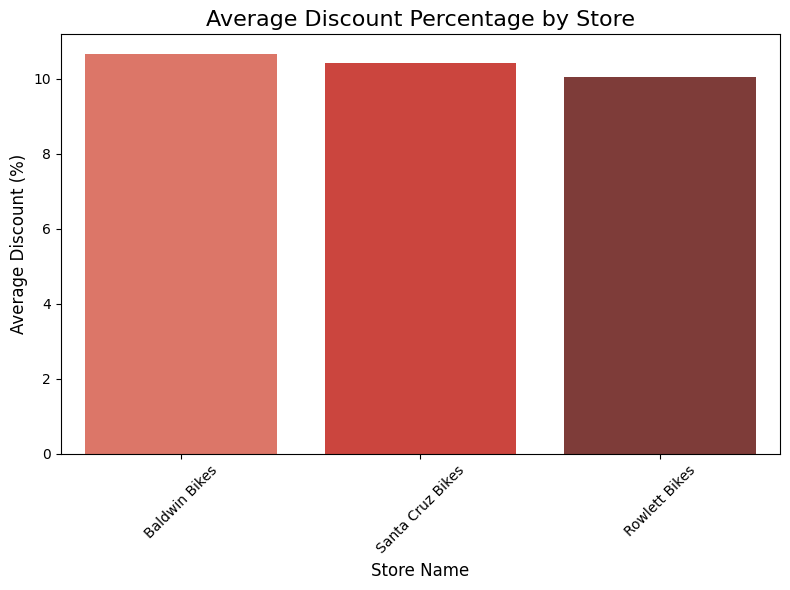

In [10]:
#bar plot for average discount by store
plt.figure(figsize=(8,6))
sns.barplot(x='store_name', y='avg_discount_percentage', data=df_avg_discount, palette='Reds_d')
plt.title('Average Discount Percentage by Store', fontsize=16)
plt.xlabel('Store Name', fontsize=12)
plt.ylabel('Average Discount (%)', fontsize=12)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()